In [1]:
%load_ext autoreload
%autoreload 2

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import sys
sys.path.append('../')
import gp

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
image, prob, gold, rhoana, bb = gp.Legacy.read_dojo_data()

In [3]:
FP_USERS = []
GP_USERS = []
FP_EXPERTS = []
GP_EXPERTS = []
with open('/home/d/GPSTUDY/study.csv', 'r') as f:
    lines = f.readlines()
for l in lines[1:]:
    line = l.strip('\n').split(',')
    userid = line[3]
    method = line[4]
    if method == 'FP':
        if userid.startswith('E'):
            FP_EXPERTS.append(userid)
        else:
            FP_USERS.append(userid)
    elif method == 'GP':
        if userid.startswith('E'):
            GP_EXPERTS.append(userid)
        else:
            GP_USERS.append(userid)

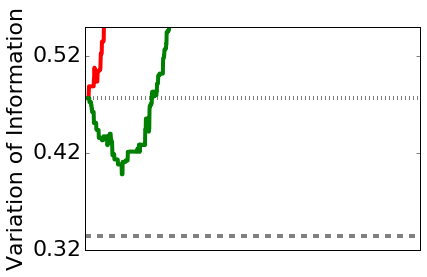

In [28]:
clamper=1500

a,b,c,d = gp.Stats.analyze_users2(['auto95FP_NEW'], ['auto95GP_NEW'], gold, rhoana, returnplt=True, vilabel=True, 
                        hideYlabels=False, showlegend=False,clampX=clamper)



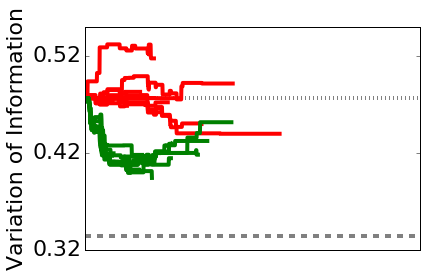

In [27]:
a,b,c,d = gp.Stats.analyze_users2(FP_USERS, GP_USERS, gold, rhoana, returnplt=True, vilabel=True, 
                        hideYlabels=False, showlegend=False,clampX=clamper)

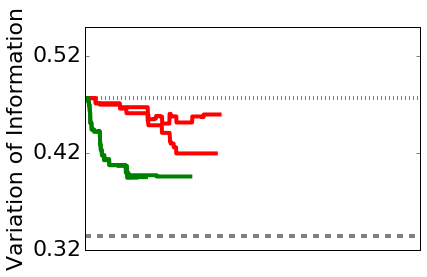

In [29]:
a,b,c,d = gp.Stats.analyze_users2(FP_EXPERTS, GP_EXPERTS, gold, rhoana, returnplt=True, vilabel=True, 
                        hideYlabels=False, showlegend=False,clampX=clamper)

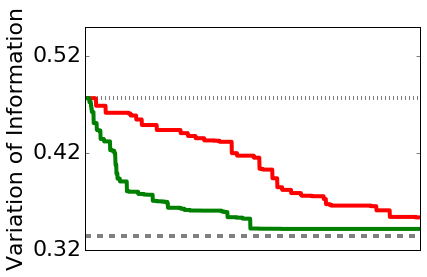

In [31]:
a,b,c,d = gp.Stats.analyze_users2(['simuserFP_NEW'], ['simuserGP_NEW'], gold, rhoana, returnplt=True, vilabel=True, 
                        hideYlabels=False, showlegend=False,clampX=clamper)

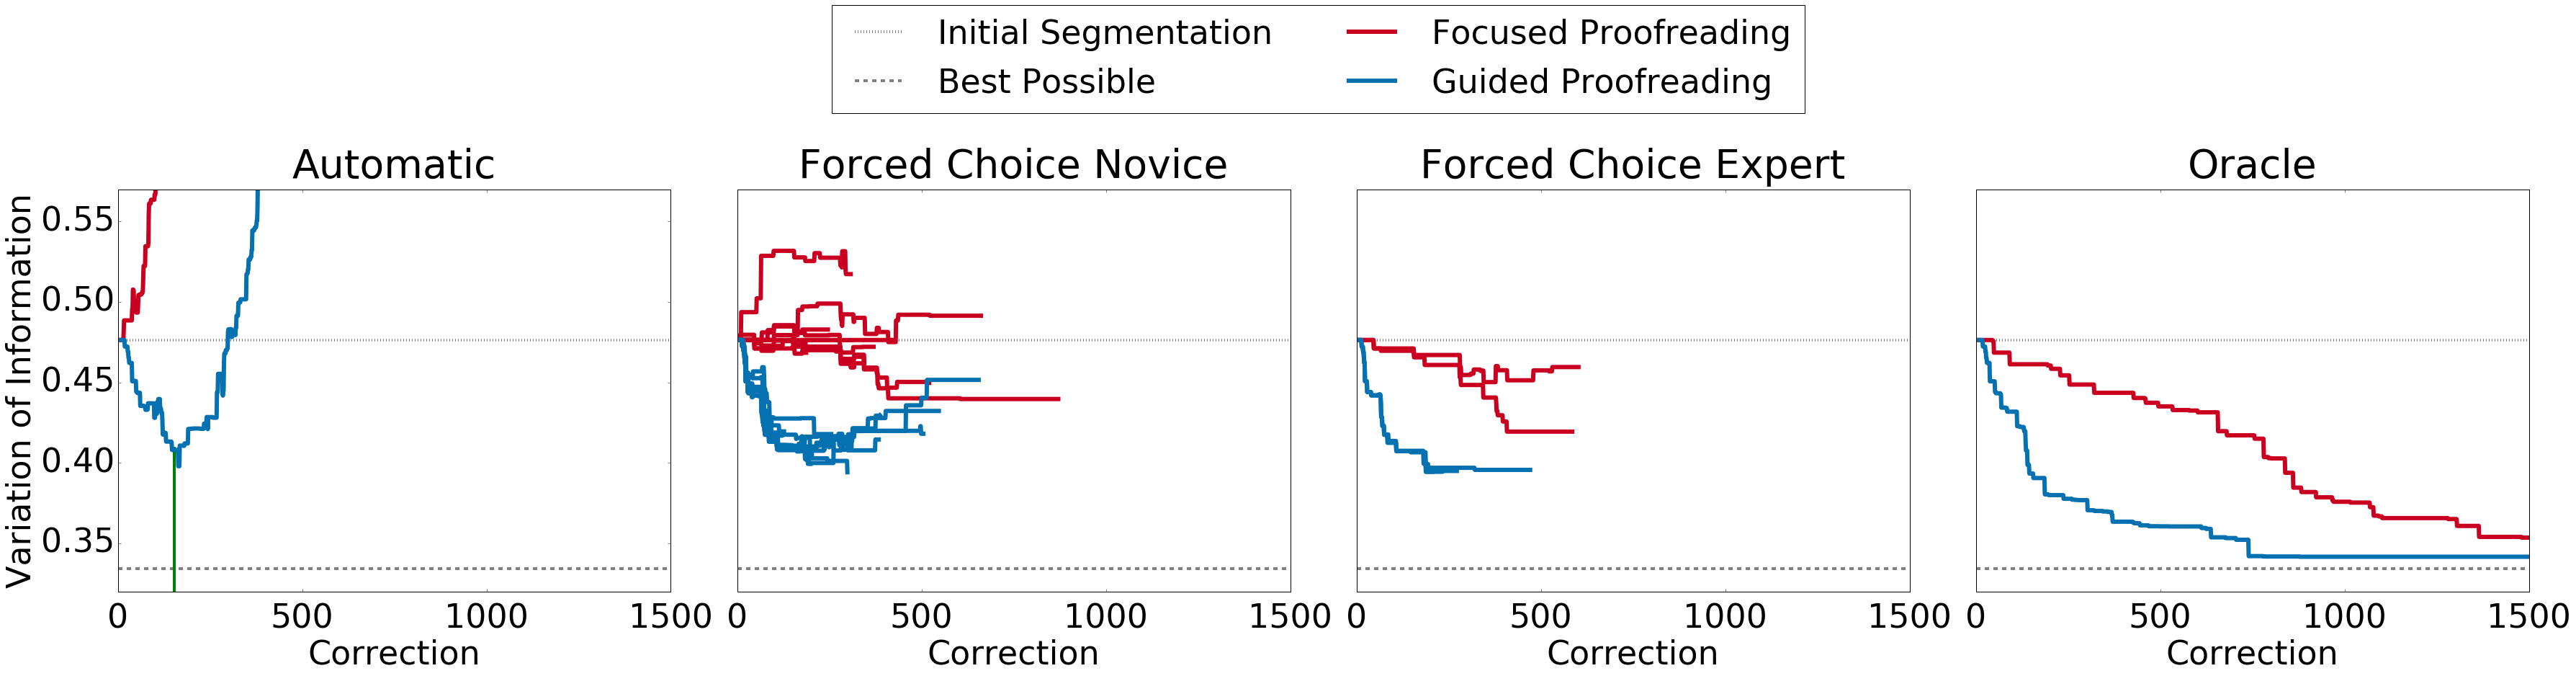

In [22]:
import matplotlib.gridspec as gridspec
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height
fig = plt.figure(1, figsize=(60,10))
clamper=1500
clamperY=[0.35, 0.57]
gs = gridspec.GridSpec(1,4,width_ratios=[1,1,1,1])
gs.update(wspace=0.12, hspace=0.05)

plt.subplot(gs[0])
a,b,c,d = gp.Stats.analyze_users2(['auto95FP_NEW'], ['auto95GP_NEW'], gold, rhoana, returnplt=True, vilabel=True, 
                        hideYlabels=False, showlegend=False,hideXlabels=False,clabel=True,hline=153,clampX=clamper,clampY=clamperY)
plt.title('Automatic', y=1.02)
plt.subplot(gs[1])
plt.title('Forced Choice Novice', y=1.02)
a,b,c,d = gp.Stats.analyze_users2(FP_USERS, GP_USERS, gold, rhoana, returnplt=True, vilabel=False, 
                        hideYlabels=True, showlegend=False,hideXlabels=False,clabel=True,clampX=clamper,clampY=clamperY)
plt.subplot(gs[2])
plt.title('Forced Choice Expert', y=1.02)
a,b,c,d = gp.Stats.analyze_users2(FP_EXPERTS, GP_EXPERTS, gold, rhoana, returnplt=True, vilabel=False, 
                        hideYlabels=True, showlegend=False,hideXlabels=False,clabel=True,bestlabel=False,clampX=clamper,clampY=clamperY)
plt.subplot(gs[3])
plt.title('Oracle', y=1.02)
a,b,c,d = gp.Stats.analyze_users2(['simuserFP_NEW'], ['simuserGP_NEW'], gold, rhoana, returnplt=True, vilabel=False, 
                        hideYlabels=True, showlegend=True,bestlabel=True, hideXlabels=False,clabel=True,clampX=clamper,clampY=clamperY)

# fig.legend()

plt.savefig('/home/d/PAPERGFX/ac4trails_combined.pdf', bbox_inches='tight')
